<a href="https://colab.research.google.com/github/usshaa/BK_Birla/blob/main/Deep_Learning_Task_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!wget --no-check-certificate https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar -xvzf food-101.tar.gz

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/

Artificial Neural Network (ANN) and a Convolutional Neural Network (CNN) using the Food-101 dataset. This guide is tailored for execution in Google Colab.

---

## 📥 Step 1: Load the Food-101 Dataset

We'll utilize TensorFlow Datasets (TFDS) to load the Food-101 dataset, which comprises 101 food categories with a total of 101,000 images.

```python

In [7]:
!pip install tensorflow tensorflow-datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 595.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.3 MB/s eta 0:00:00


In [8]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [9]:
# Load the dataset
(ds_train, ds_test), ds_info = tfds.load(
    'food101',
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.YPFRU5_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.YPFRU5_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [10]:
# Display dataset information
print(ds_info)

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_dir='/root/tensorflow_datasets/food101/2.0.0',
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    split

```

*Note:* The Food-101 dataset is available through TensorFlow Datasets. For more details, you can visit the [TensorFlow Datasets catalog](https://www.tensorflow.org/datasets/catalog/food101).

---

## 🧹 Step 2: Preprocess the Data

We'll normalize the images and resize them to a consistent size suitable for our models.

```python

In [11]:
# Define image size and batch size
IMG_SIZE = 128
BATCH_SIZE = 32

In [12]:
# Function to normalize and resize images
def preprocess(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    return image, label

In [13]:
# Apply preprocessing to the datasets
ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache().shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

```

---

## 🧠 Step 3: Build and Train the ANN Model

We'll construct a simple ANN model for image classification.

```python

In [14]:
from tensorflow.keras import layers, models

Here is the diagram illustrating the structure of your ANN model. It shows the flow of data through the layers:

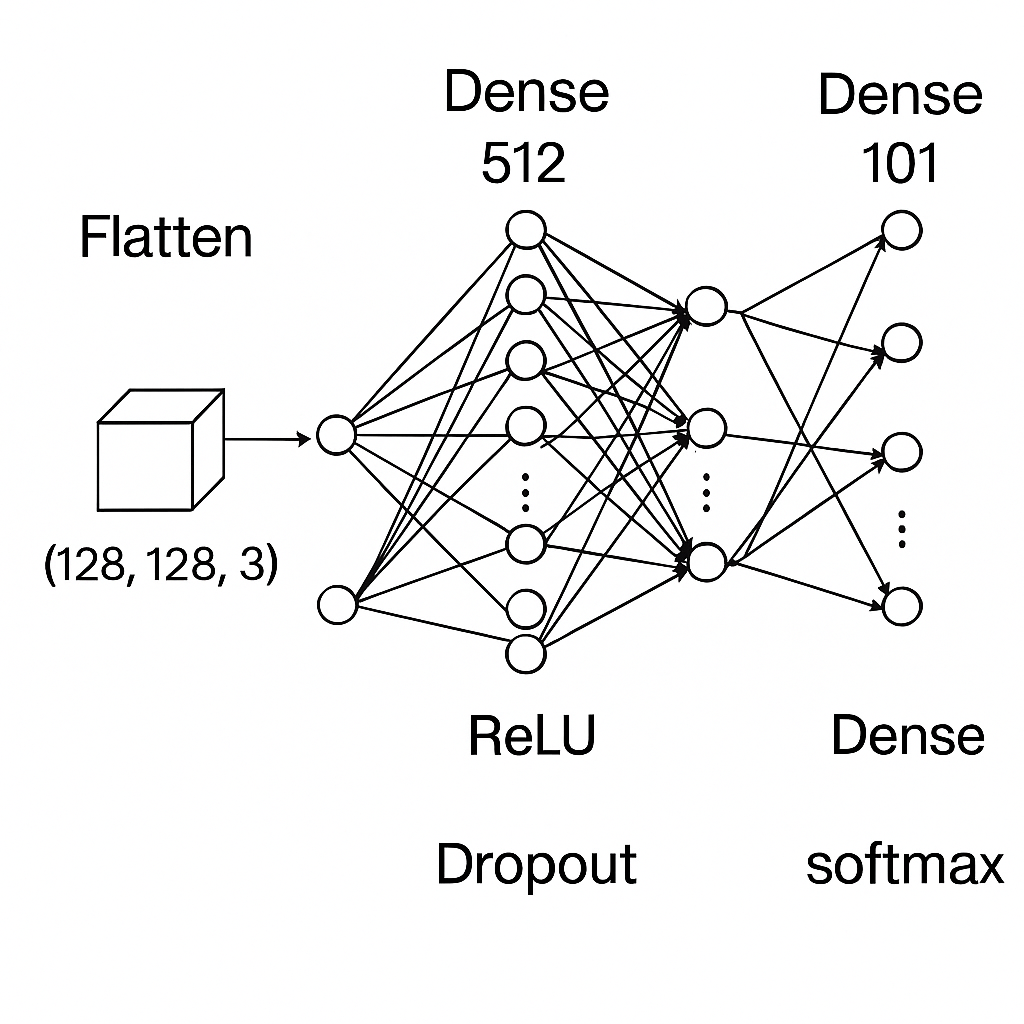

- The Flatten layer takes the input image of size (128, 128, 3) and flattens it into a 1D vector.

- The first Dense layer has 512 neurons, uses the ReLU activation funct
ion, and learns complex features from the input.

- Dropout is applied to randomly "drop" some of the neurons during training to prevent overfitting.

- The final Dense layer has 101 neurons (for 101 classes) and uses the softmax activation to output probabilities for each class.

In [15]:
# Define the ANN model
ann_model = models.Sequential([
    layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(101, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Compile the model
ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [17]:
# Train the model
ann_history = ann_model.fit(ds_train, epochs=10, validation_data=ds_test)

Epoch 1/10
 480/2368 ━━━━━━━━━━━━━━━━━━━━ 28:00 890ms/step - accuracy: 0.0120 - loss: 8.7903

KeyboardInterrupt: 

```

---

## 🧠 Step 4: Build and Train the CNN Model

Next, we'll build a CNN model, which is typically more effective for image classification tasks.

```python

In [18]:
# Define the CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(101, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# Train the model
cnn_history = cnn_model.fit(ds_train, epochs=10, validation_data=ds_test)

```

---

## 📊 Step 5: Evaluate and Compare the Models

We'll evaluate both models on the test dataset and compare their performance.

```python

In [ ]:
# Evaluate the ANN model
ann_loss, ann_accuracy = ann_model.evaluate(ds_test)
print(f'ANN Test Accuracy: {ann_accuracy:.4f}')

In [ ]:
# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(ds_test)
print(f'CNN Test Accuracy: {cnn_accuracy:.4f}')

```

---

## 📈 Step 6: Visualize Training History

Let's plot the training and validation accuracy for both models to visualize their learning progress.

```python

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Plot ANN training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Plot CNN training history
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

```

---

## ✅ Summary

- **Dataset:** [Food-101](https://www.tensorflow.org/datasets/catalog/food101)
- **Models:** Compared ANN and CNN architectures
- **Findings:** CNNs typically outperform ANNs in image classification tasks due to their ability to capture spatial hierarchies in images.

Feel free to experiment with different architectures, hyperparameters, or data augmentation techniques to further improve model performance.